Case: Score de Crédito dos Clientes
Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

In [32]:
import pandas as pd

tabela = pd.read_csv("/content/sample_data/clientes.csv") # importa a base de dados
display(tabela.head())
display(tabela.tail())

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1
99999,37932,8,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,382.0,24.028477,alto_gasto_pagamento_medio,393.673696,Poor,1,0,0,0,1


In [2]:
# check if we have empty values or values recognized in the wrong format
print(tabela.info())
print(tabela.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

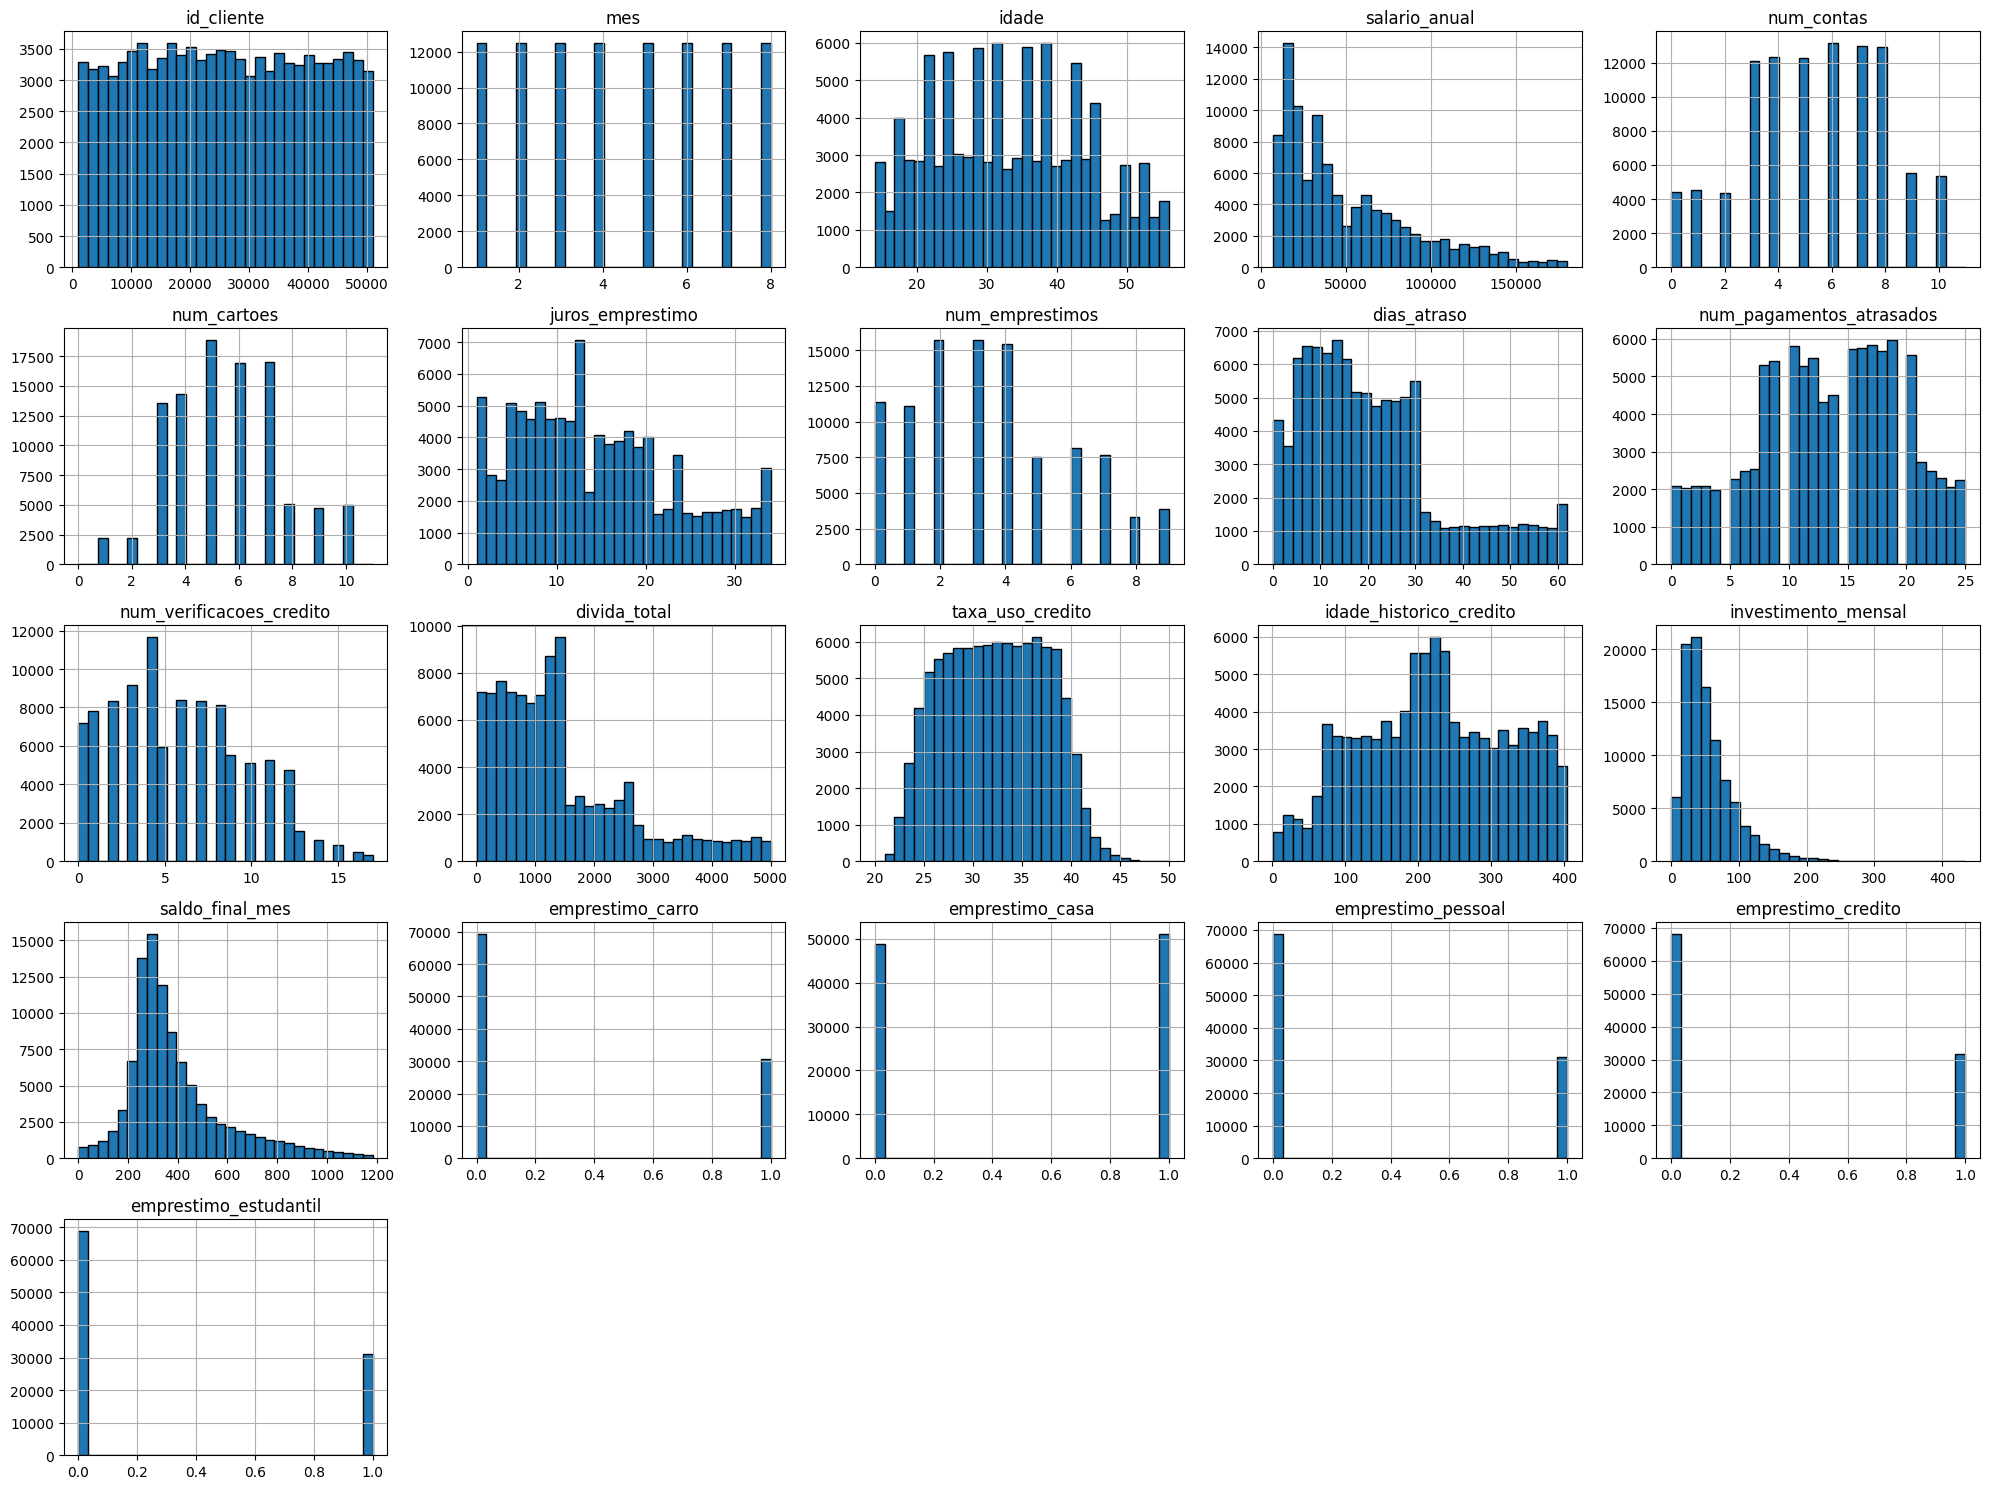

In [3]:
import matplotlib.pyplot as plt

# Plotar gráfico visual das variáveis numéricas
tabela.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
# will transform text columns into numbers, e.g., professions will change from scientist, teacher, mechanic, etc., to 0, 1, 2, etc.
codificador = LabelEncoder()

# we do not apply it to the score_credit column, which is our target
for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "score_credito":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

# checking if all columns have actually been modified
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

In [5]:
display(tabela.head())
display(tabela.tail())

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,2,341.489231,Good,1,1,1,1,0


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
99995,37932,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,0,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,2,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,0,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,3,319.164979,Standard,1,0,0,0,1
99999,37932,8,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,382.0,24.028477,2,393.673696,Poor,1,0,0,0,1


In [34]:
# choosing which columns we will use to train the model
# y is the column we want the model to predict
# x includes all the columns we will use to predict the credit score, we will not use the column id_cliente because it is just a random number that does not help in prediction
x = tabela.drop(["score_credito", "id_cliente"], axis=1)
y = tabela["score_credito"]

from sklearn.model_selection import train_test_split

# we separate the data into training and testing. We will give the training data to the models to learn, and we will use the testing data to see if the model has learned correctly.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#-----------------models--------------------------
modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()
#-------------------trainning models--------------
modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [36]:
# se o nosso modelo chutasse tudo "Standard", qual seria a acurácia do modelo?
contagem_scores = tabela["score_credito"].value_counts()
print(contagem_scores['Standard'] / sum(contagem_scores))

0.53174


In [37]:
from sklearn.metrics import accuracy_score

# calculamos as previsoes
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste.to_numpy())

# comparamos as previsoes com o y_teste
# esse score queremos o maior (maior acuracia, mas tb tem que ser maior do que o chute de tudo Standard)
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8259666666666666
0.7324


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definindo os hiperparâmetros para o RandomForestClassifier
parametros_arvore = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Definindo os hiperparâmetros para o KNeighborsClassifier
parametros_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inicializando os modelos
modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()


In [11]:
# Inicializando o GridSearchCV para RandomForestClassifier
grid_search_arvore = GridSearchCV(estimator=modelo_arvore, param_grid=parametros_arvore, cv=5, n_jobs=-1, verbose=2)

# Inicializando o GridSearchCV para KNeighborsClassifier
grid_search_knn = GridSearchCV(estimator=modelo_knn, param_grid=parametros_knn, cv=5, n_jobs=-1, verbose=2)

# Treinando os modelos com GridSearchCV
grid_search_arvore.fit(x_treino, y_treino)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [12]:
grid_search_knn.fit(x_treino, y_treino)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [13]:
# Obtendo os melhores parâmetros e o melhor modelo
melhor_modelo_arvore = grid_search_arvore.best_estimator_
melhores_parametros_arvore = grid_search_arvore.best_params_

melhor_modelo_knn = grid_search_knn.best_estimator_
melhores_parametros_knn = grid_search_knn.best_params_

print("Melhores parâmetros para RandomForestClassifier:", melhores_parametros_arvore)
print("Melhores parâmetros para KNeighborsClassifier:", melhores_parametros_knn)

# Avaliando os modelos otimizados no conjunto de teste
acuracia_arvore = melhor_modelo_arvore.score(x_teste, y_teste)
acuracia_knn = melhor_modelo_knn.score(x_teste, y_teste)

print("Acurácia do RandomForestClassifier otimizado:", acuracia_arvore)
print("Acurácia do KNeighborsClassifier otimizado:", acuracia_knn)


Melhores parâmetros para RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhores parâmetros para KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Acurácia do RandomForestClassifier otimizado: 0.8245666666666667
Acurácia do KNeighborsClassifier otimizado: 0.7881


In [14]:
# Exibindo os melhores parâmetros
print("Melhores parâmetros para RandomForestClassifier:", grid_search_arvore.best_params_)
print("Melhores parâmetros para KNeighborsClassifier:", grid_search_knn.best_params_)

Melhores parâmetros para RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhores parâmetros para KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Fazendo novas previsões


In [45]:
# Carregar dados de novos clientes
novos_clientes = pd.read_csv("/content/sample_data/novos_clientes.csv")
display(novos_clientes.head(10))

# Aplicar a transformação para dados categóricos
# Suponha que o codificador já tenha sido ajustado com os dados de treinamento
for coluna in novos_clientes.columns:
    if novos_clientes[coluna].dtype == "object" and coluna != "score_credito":
       novos_clientes[coluna] = codificador.fit_transform(novos_clientes[coluna])

# Selecionar apenas os primeiros 10 registros para previsão
novos_clientes_10 = novos_clientes.head(10)

# Fazer previsões
previsoes = modelo_arvore.predict(novos_clientes_10)
print("Previsões para os primeiros 10 novos clientes:")
print(previsoes)


,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


Previsões para os primeiros 10 novos clientes:
['Poor' 'Good' 'Standard']


In [25]:
# quais as caracteristicas mais importantes para definir o score de credito?
colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=modelo_arvore.feature_importances_)
importancia = importancia * 100
print(importancia)

                                  0
mes                        3.945426
idade                      4.252013
profissao                  3.273968
salario_anual              5.097667
num_contas                 3.338400
num_cartoes                4.479059
juros_emprestimo           8.560422
num_emprestimos            3.025432
dias_atraso                6.717787
num_pagamentos_atrasados   4.550826
num_verificacoes_credito   4.181359
mix_credito                8.546371
divida_total              11.316227
taxa_uso_credito           5.108966
idade_historico_credito    7.422940
investimento_mensal        4.874573
comportamento_pagamento    2.346390
saldo_final_mes            5.400073
emprestimo_carro           0.704338
emprestimo_casa            0.754002
emprestimo_pessoal         0.695552
emprestimo_credito         0.709729
emprestimo_estudantil      0.698480


In [52]:
# Correto uso do predict_proba para multiclasse
probabilidades = modelo_arvore.predict_proba(x_teste)
print(probabilidades.shape)


(30000, 3)


In [54]:
from sklearn.metrics import roc_auc_score

# AUC utilizando o método One-vs-Rest (OvR)
auc_ovr = roc_auc_score(y_teste, probabilidades, multi_class='ovr', average='macro')
print("AUC (One-vs-Rest): {:.2f}".format(auc_ovr))

# AUC utilizando o método One-vs-One (OvO) - Opção alternativa
auc_ovo = roc_auc_score(y_teste, probabilidades, multi_class='ovo', average='macro')
print("AUC (One-vs-One): {:.2f}".format(auc_ovo))


AUC (One-vs-Rest): 0.94
AUC (One-vs-One): 0.94


In [56]:
print(y_teste.value_counts())


score_credito
Standard    15990
Poor         8683
Good         5327
Name: count, dtype: int64


In [62]:
from sklearn.preprocessing import LabelEncoder
# will transform text columns into numbers, e.g., professions will change from scientist, teacher, mechanic, etc., to 0, 1, 2, etc.
codificador = LabelEncoder()

# we do not apply it to the score_credit column, which is our target
for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "score_credito":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

# checking if all columns have actually been modified
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Definir X e y
X = tabela.drop('score_credito', axis=1)  # Remover a coluna do target para criar as features
y = tabela['score_credito']              # Definir o target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [97]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Definir X e y
X = tabela.drop('score_credito', axis=1)
y = tabela['score_credito']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obter o número da menor classe
min_class_size = y_train.value_counts().min()

# Configurar SMOTE para aumentar as classes minoritárias até a menor classe
smote_strategy = { 'Standard': min_class_size,  # Reduzir se maior
                   'Poor': min_class_size,      # Aumentar se menor
                   'Good': min_class_size }     # Aumentar se menor

# Configurar RandomUnderSampler para reduzir as classes majoritárias
under_strategy = { 'Standard': min_class_size,  # Reduzir para igualar
                   'Poor': min_class_size,      # Manter se já igual
                   'Good': min_class_size }     # Manter se já igual

# Criar pipeline de resampling
pipeline = Pipeline([

    ('under', RandomUnderSampler(sampling_strategy=under_strategy, random_state=42))
])

# Aplicar resampling
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

# Verificar a nova distribuição
print(pd.Series(y_train_res).value_counts())


score_credito
Good        14301
Poor        14301
Standard    14301
Name: count, dtype: int64


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#-----------------models--------------------------
modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()
#-------------------trainning models--------------
modelo_arvore.fit(X_train, y_train)
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
# se o nosso modelo chutasse tudo "Standard", qual seria a acurácia do modelo?
contagem_scores = tabela["score_credito"].value_counts()
print(contagem_scores['Standard'] / sum(contagem_scores))

0.53174


In [105]:
from sklearn.metrics import accuracy_score

# calculamos as previsoes
previsao_arvore = modelo_arvore.predict(X_test)
previsao_knn = modelo_knn.predict(X_test.to_numpy())

# comparamos as previsoes com o y_teste
# esse score queremos o maior (maior acuracia, mas tb tem que ser maior do que o chute de tudo Standard)
print(accuracy_score(y_test, previsao_arvore))
print(accuracy_score(y_test, previsao_knn))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.83665
0.7983


In [101]:
# Correto uso do predict_proba para multiclasse
probabilidades = modelo_arvore.predict_proba(X_test)
print(probabilidades.shape)


(20000, 3)


In [102]:
from sklearn.metrics import roc_auc_score

# AUC utilizando o método One-vs-Rest (OvR)
auc_ovr = roc_auc_score(y_test, probabilidades, multi_class='ovr', average='macro')
print("AUC (One-vs-Rest): {:.2f}".format(auc_ovr))

# AUC utilizando o método One-vs-One (OvO) - Opção alternativa
auc_ovo = roc_auc_score(y_test, probabilidades, multi_class='ovo', average='macro')
print("AUC (One-vs-One): {:.2f}".format(auc_ovo))


AUC (One-vs-Rest): 0.94
AUC (One-vs-One): 0.95


In [103]:

print(y_teste.value_counts())
print(y_test.value_counts())

score_credito
Standard    15990
Poor         8683
Good         5327
Name: count, dtype: int64
score_credito
Standard    10599
Poor         5874
Good         3527
Name: count, dtype: int64


In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

n_classes = probabilidades.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    classe_positivos = np.sum(y_teste == i)
    if classe_positivos > 0:  # Só calcular se houver exemplos positivos
        fpr[i], tpr[i], _ = roc_curve(y_teste == i, probabilidades[:, i])
        roc_auc[i] = roc_auc_score(y_teste == i, probabilidades[:, i])
    else:
        fpr[i], tpr[i] = [0, 1], [0, 1]  # Curva ROC trivial
        roc_auc[i] = np.nan  # AUC não definida
        print(f"Classe {i} não tem exemplos positivos; AUC não calculada.")


Classe 0 não tem exemplos positivos; AUC não calculada.
Classe 1 não tem exemplos positivos; AUC não calculada.
Classe 2 não tem exemplos positivos; AUC não calculada.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')
    else:
        plt.plot(fpr[i], tpr[i], linestyle='--', label=f'ROC curve for class {i} (AUC not defined)')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Class')
plt.legend(loc="lower right")
plt.show()
